## Exploration write-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("gss2012.csv")
%matplotlib inline

In [2]:
df.loc[df['age']>=16,'Generation'] = 'Millennials'
df.loc[df['age']>=32, 'Generation'] = 'Generation X'
df.loc[df['age']>=48, 'Generation'] = 'Baby Boomer'
df.loc[df['age']>=67, 'Generation'] = 'Silent'
df.loc[df['age']>=85, 'Generation'] = 'Greatest'
df.loc[pd.isnull(df['age']), 'Generation'] = np.nan
df['Generation Cohort'] = df.Generation.fillna('Missing')
df['Vote08'] = df.vote08_coded.fillna('Missing')
df['Poli'] = df.polviews.fillna('Missing')
df['party'] = df.partyid.fillna('Unknown')
df['President_2008'] = df.pres08.fillna('No Vote')

### Introduction

In this exploratory data analysis, I focus on the differences of political ideologies among different generation cohorts using the data from General Social Survey (2012). Pew research center conducted a great study in 2014 that examined political typologies among different age groups. They found out that political typologies shifted with age, with the percentage of conservatives increased with age increasing. Even though it was possible that people might became more conservative as they got older, the researchers in Pew concluded that political preferences tended to be formed and imprinted during the early age. In this study, following the same principles of the Pew research in 2014, I divide the whole sample into five generation subgroups (“Millennials”, “Generation X”, “Baby Boomer”, “Silent”, and the “Greatest”) and examine the following research questions:

1.	What is the demographics distribution of the five generation cohorts?

2.	What is voting result of the 2008 presidential election among the five generation cohorts?

3.	Are there any observable differences between the political views and party affiliations of different generation cohorts? What can be learned from the data that may predict future election results?

### The Demographics (Education):

Text(0.5,1,'Fig 1: Education level among different generation cohorts (2012)')

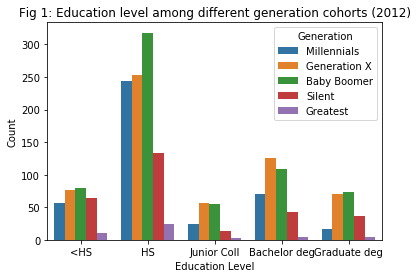

In [3]:
sns.countplot(x="degree", hue="Generation", order=['<HS','HS','Junior Coll','Bachelor deg','Graduate deg'], data=df)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Fig 1: Education level among different generation cohorts (2012)')

The part of this EDA is designed to examine if there are observable differences of demographics among different generation cohorts. In this study, education level is examined. The goal of this part is to get cautious about potential confounding variables and provide more possible explanations for future analysis (especially there are a lot of dispute of low education voters in the election last year).

Fig 1 shows the education level differences among different generation cohorts. It can be easily observed that the “Baby Boomer” cohort has more HS graduates compared with “Generation X”. This warns us that any difference of political views of “Baby Boomers” can be attributed to the fact that there are comparatively more HS graduates in this subgroup. 

### Vote Behavior (Presidential election 2008):

Text(0.5,1,'Fig 2: Voting behavior among different generation cohorts in 2008')

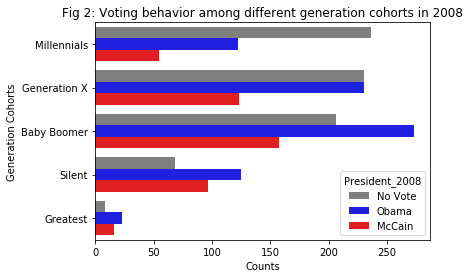

In [4]:
sns.countplot(y="Generation", hue="President_2008", data=df, palette = ['Grey','blue','red'])
plt.ylabel('Generation Cohorts')
plt.xlabel('Counts')
plt.title('Fig 2: Voting behavior among different generation cohorts in 2008')

Fig 2 shows the voting results of different generation cohorts at the 2008 presidential election. In general, all generation cohorts preferred Obama over McCain. However, Millennials and Generation X preferred Obama most, with more than two thirds of eligible votes going to Obama, In comparison, Silent and Greatest generation tends to be conservative, with similar number of votes going to both candidates. 

Additionally, despite the overall preference of Obama over McCain, a significant number of eligible voters did not vote for the presidential candidate in 2008. In general, older generation cohorts tend to have high turnout rate, while nearly a half of the Millennials did not vote for the presidential candidate in 2008. Pew research in 2014 has also found out that Millennials tend to be bystanders, and I think this is also the reason why the Republicans have gotten a sounding victory in 2016 because their potential voters (lean Rep) have a higher turnout rate than voters leaning left.

### Political Views and Party Affiliations:

Text(0,0.5,'Percenrate')

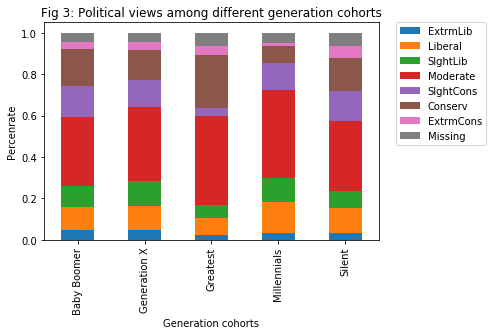

In [5]:
a = df.groupby([ 'Generation', 'Poli']).size()/df.groupby([ 'Generation']).size()
df2_unstack = a.unstack()
df2_unstack[['ExtrmLib', 'Liberal', 'SlghtLib', 'Moderate', 'SlghtCons', 'Conserv', 'ExtrmCons', 'Missing']].plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Fig 3: Political views among different generation cohorts')
plt.xlabel('Generation cohorts')
plt.ylabel('Percenrate')

Text(0,0.5,'Percentage')

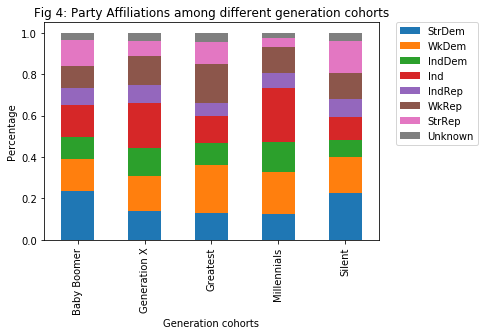

In [6]:
a = df.groupby([ 'Generation', 'party']).size()/df.groupby([ 'Generation']).size()
df2_unstack = a.unstack()
df2_unstack[['StrDem', 'WkDem', 'IndDem', 'Ind', 'IndRep', 'WkRep', 'StrRep', 'Unknown']].plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Fig 4: Party Affiliations among different generation cohorts')
plt.xlabel('Generation cohorts')
plt.ylabel('Percentage')

Fig 3 shows the political views of different generation cohorts. Among different generation cohorts, the majority are in the middle. Over 40% of the “Greatest” cohort self-identify them as moderate (“neither left or right”) and about 30% of the “Baby Boomer” cohort self-identify them as moderate. The most liberal group among the five is the “Millennials” cohort, with 30% of respondents self-identify them as liberal (“Extreme liberal”, “Liberal”, “Slight Liberal”). The most conservative group is the “Baby Boomer” cohort, with about 30% self-identify them as conservative (“Extreme conservative”, “Conservative”, “Slight Conservative”). The findings align with the Pew 2014 research.

Fig 4 shows the party affiliations of different generation cohorts. One thing to note is that even though “Baby Boomers” tend to be conservative overall, they have the greatest percentage of (lean) Democratic respondents, which adds up to 40%. In comparison, a well-known liberal cohort, the “Millennials”, tend to have a slightly lower percentage of (lean) Democratic respondents. Additionally, over 20% of Millennial respondents are independent. This implies that even though “Millennials” are generally considered liberal, they are largely apolitical and democratic candidates may not necessarily gain sound support from this cohort group. Finally, Fig 4 also shows that with the generation changes (get younger), there are more people in the middle. This proves that the young in the US are increasingly not interested in politics despite being liberal. Putnam also gives out a great idea that the US are losing social capital since the younger generations are no longer in public affairs when compared with their parents. 

## Conclusion:

What can democrats (and we) learn from this result and how can they avert a failure that happened in the 2016 election? 

1 – Support does not generally mean votes. For example, “Millennials” have a low turnout rate, and no matter how a democratic candidate is favored by the median (and general public), the democratic candidate needs to design campaigns to encourage people to vote (and thus increase turnout rate).

2 – Political views, though political, are generally different from party affiliations. The younger generation in the US are more liberal but less interested in politics. I think that is a bad thing for both the Democrats and the public. The public needs a voice from the young to make better decisions and elect better candidates.  